_Version log: Investigating the Hartley Transform_

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as spfft

c = 299_800_000

In [79]:
def gaussian(x, center, FWHM):
    sigma = (8 *np.log(2))**-0.5 *FWHM
    normalisation_coeffient = 1  #1 /(sigma *(2*np.pi)**0.5)
    exponent = -(1/2) *(x -center)**2 /(sigma**2)
    return normalisation_coeffient *np.exp(exponent)

In [80]:
array_length = 320 #in pixels
pixel_pitch = 80 #in um
central_freq = 5 #in THz
FWHM_freq = 10 #in THz
theta = 60 #in arcminutes
noise_level = 0 #% of maximum amplitude

In [81]:
central_wavenumber = 2*np.sin(np.deg2rad(theta/60)) *(central_freq*1e12) /c #periodicity of the fringes as it appears on the camera in m^-1
FWHM_wavenumber = 2*np.sin(np.deg2rad(theta/60)) *(FWHM_freq*1e12) /c # in m^-1

print(1/central_wavenumber/(pixel_pitch*1e-6)) # effective wavelength in pixels


21.472683514831687


In [82]:
wavenumbers = np.fft.rfftfreq(array_length, (pixel_pitch*1e-6))
freqs = c *wavenumbers /(2*np.sin(np.deg2rad(theta/60))) *1e-12 #in THz
phase = [(-1)**n for n in range(len(wavenumbers))] #ensure that the center of each wave is positive.
amplitudes = phase *gaussian(wavenumbers, central_wavenumber, FWHM_wavenumber)

oversampled_wn = np.fft.rfftfreq(array_length *10, (pixel_pitch*1e-6))
oversampled_freqs = c *oversampled_wn /(2*np.sin(np.deg2rad(theta/60))) *1e-12 #in THz
oversampled_phase = [(-1)**n for n in range(len(oversampled_wn))] #ensure that the center of each wave is positive.
oversampled_amps = oversampled_phase *gaussian(oversampled_wn, central_wavenumber, FWHM_wavenumber)

intensity = np.fft.irfft(amplitudes, norm= "forward")
noise = (2*np.random.rand(len(intensity)) -1) *np.max(np.abs(intensity)) *noise_level/100
intensity += noise
displacement = [n *pixel_pitch*1e-3 for n in range(len(intensity))]

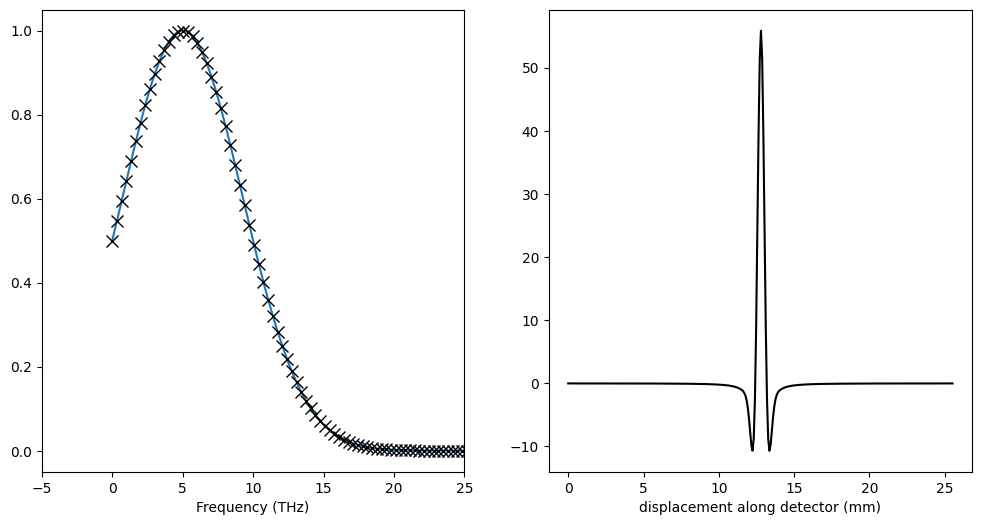

In [83]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].plot(oversampled_freqs, np.abs(oversampled_amps))
axs[0].plot(freqs, np.abs(amplitudes), linestyle= "None", marker= "x", markersize= 8, color= "k")
axs[0].set(xlabel= "Frequency (THz)", xlim= (central_freq-FWHM_freq, central_freq+2*FWHM_freq))

axs[1].plot(displacement, intensity, color= "k")
axs[1].set(xlabel= "displacement along detector (mm)")

plt.show()

In [84]:
#np.savetxt("data\\1dmock6.csv", intensity, delimiter=",")